In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [129]:
train_data = pd.read_csv('../datasets/clean_train.csv')
test_data = pd.read_csv('../datasets/clean_test.csv')
data = pd.read_csv('../datasets/clean_alldata.csv')

In [130]:
corr = train_data.corr()
corr_sale = corr['SalePrice'].sort_values(ascending=False)

C:\Users\snirt\AppData\Local\Temp\ipykernel_18604\3257424763.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  p1.set_xticklabels(p1.get_xticklabels(), rotation=45, horizontalalignment='right')


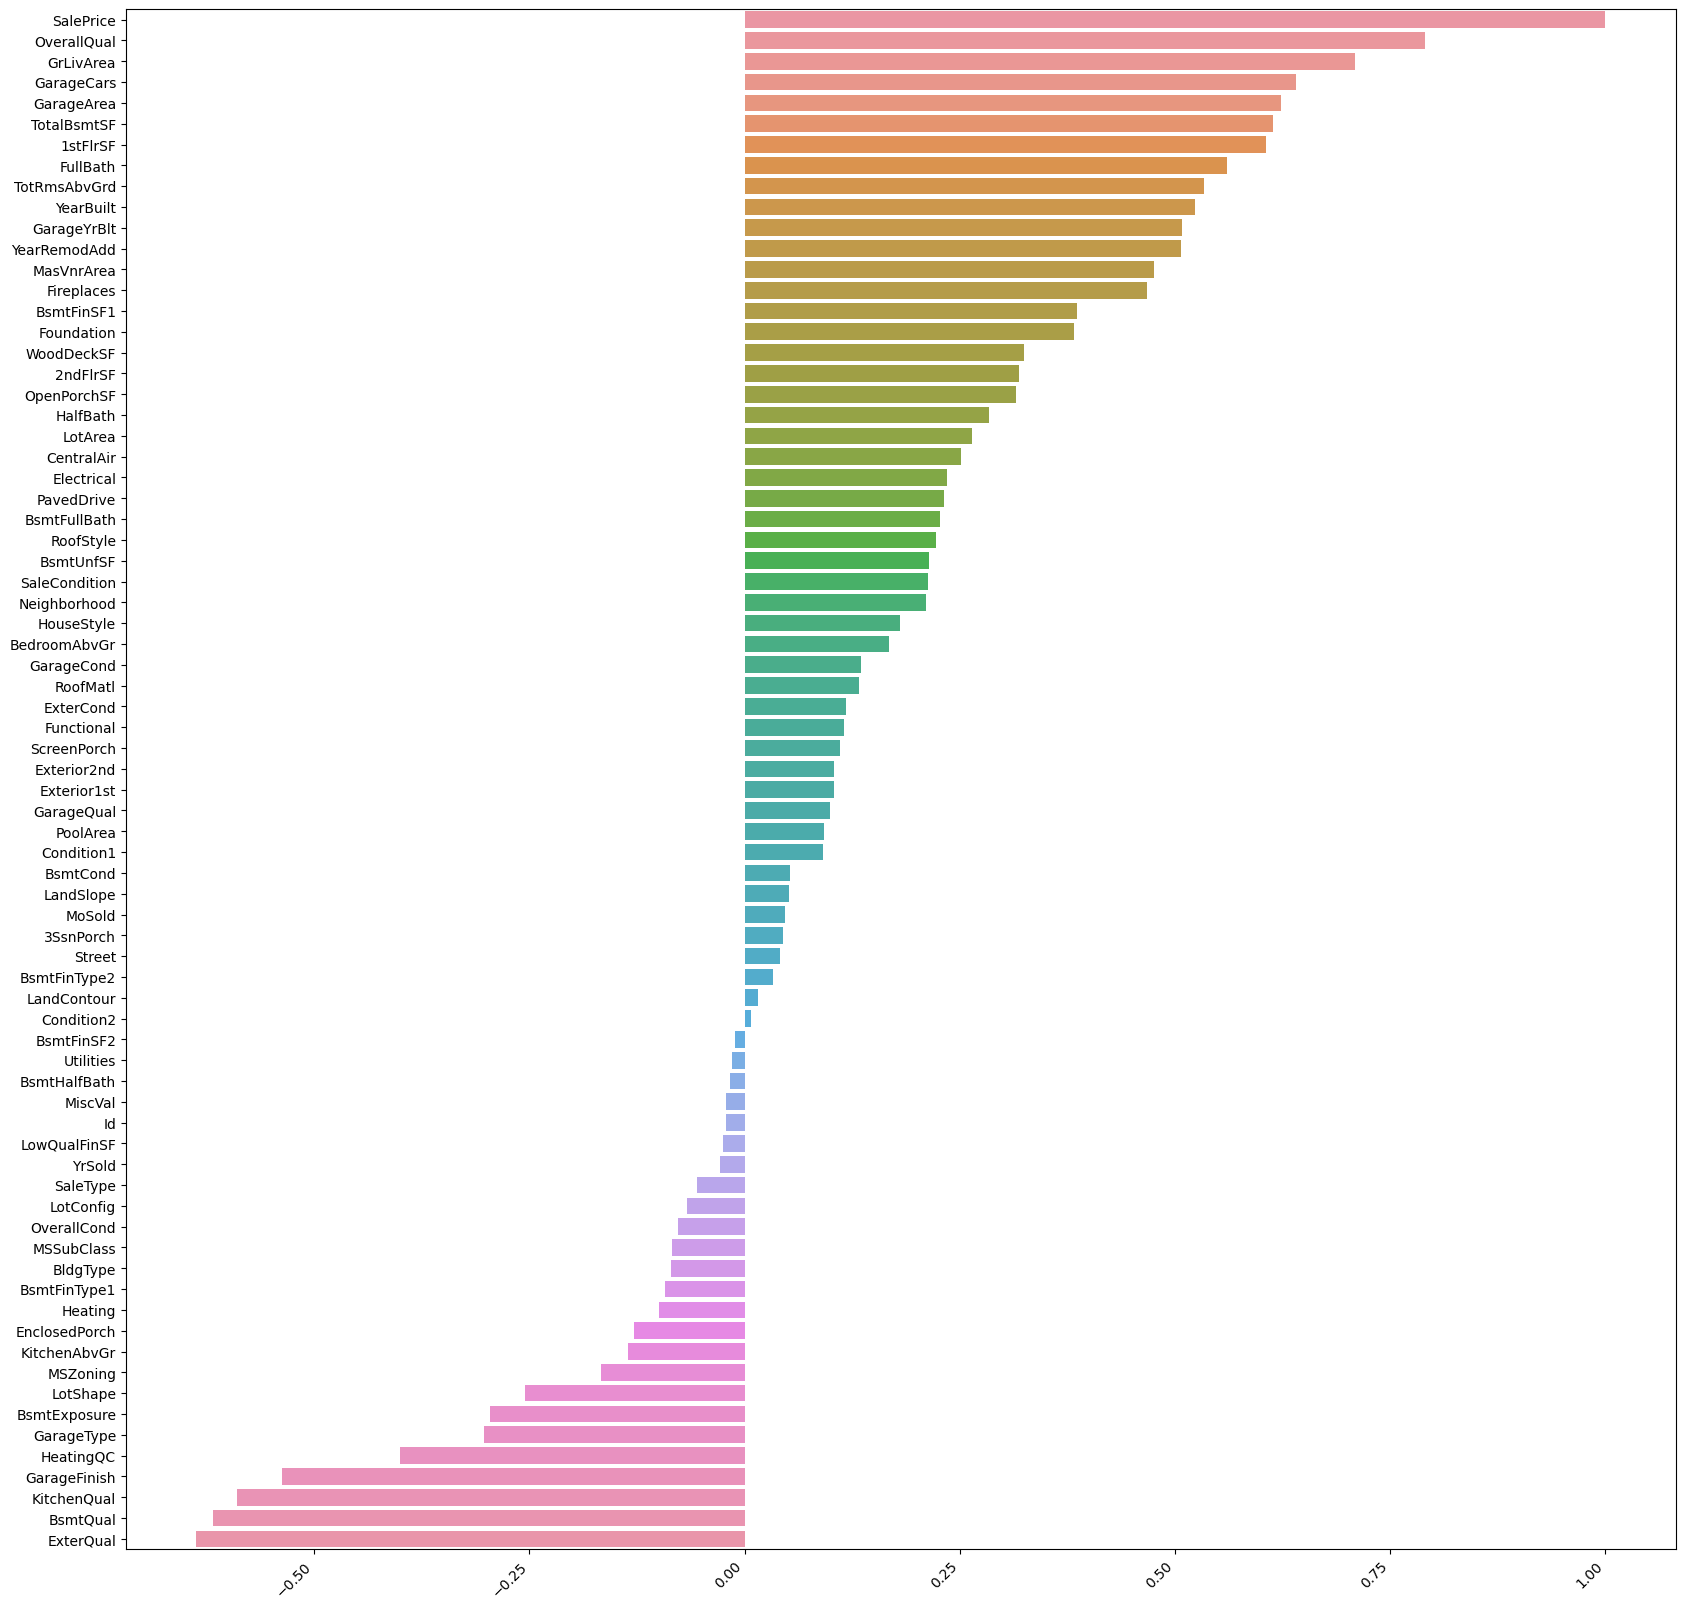

In [131]:
plt.figure(figsize=(20,20))
p1 = sns.barplot(y=corr_sale.index, x=corr_sale.values)
p1.set_xticklabels(p1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

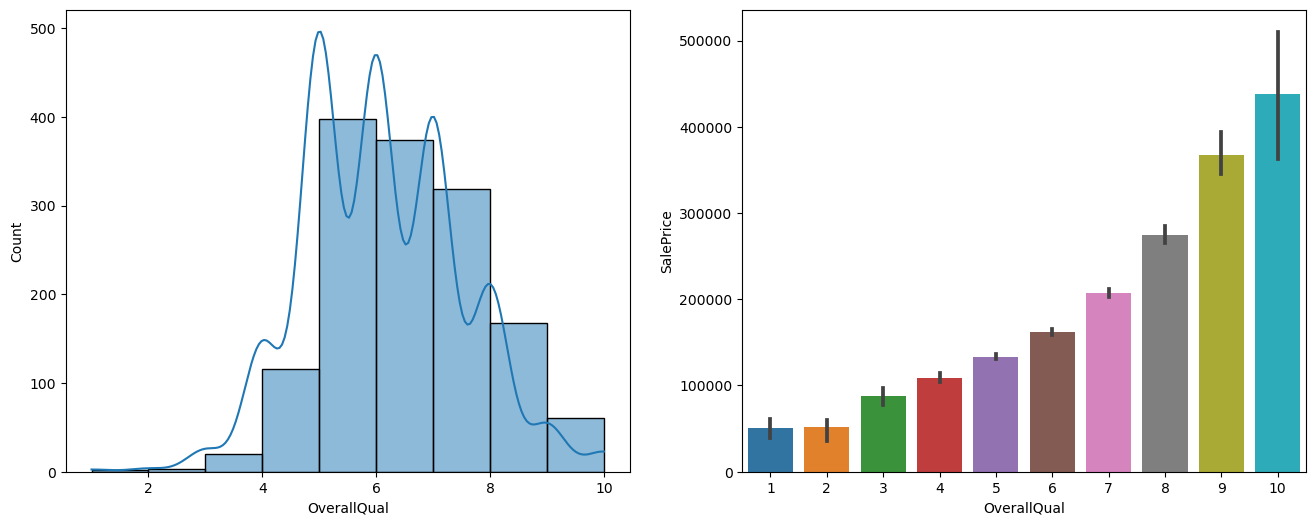

In [132]:
fig, axis = plt.subplots(1,2, figsize=(16,6))
sns.histplot(x='OverallQual', data=train_data, ax=axis[0], kde=True, bins=range(1,11))
sns.barplot(y = train_data['SalePrice'] ,x = train_data['OverallQual'], ax=axis[1])
plt.show()

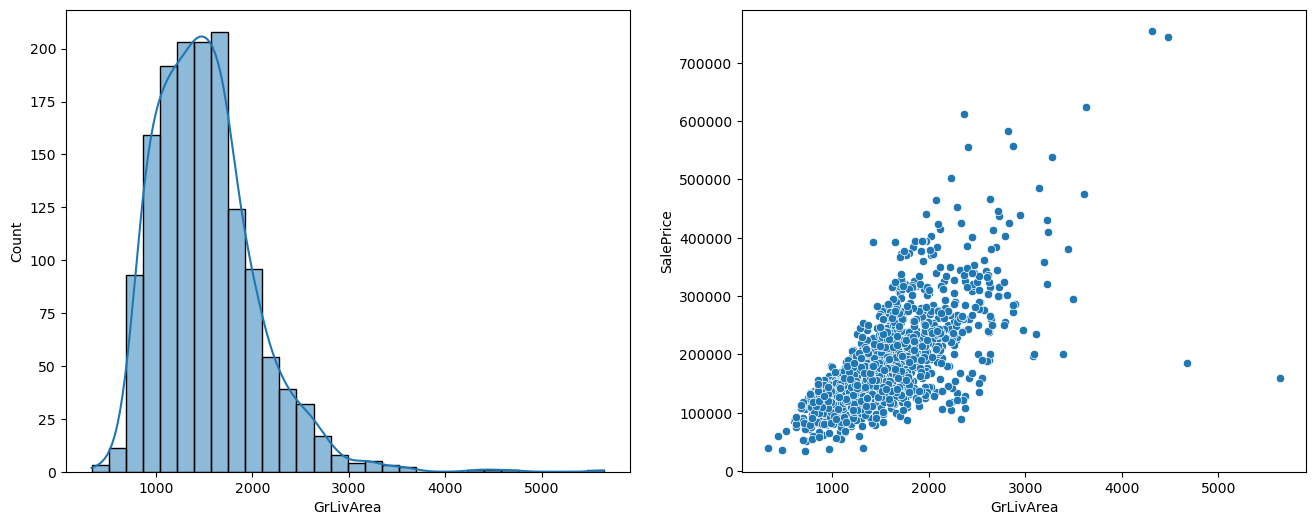

In [133]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.histplot(x ='GrLivArea', bins=30, data=train_data, ax=ax[0], kde=True)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, ax=ax[1])
plt.show()

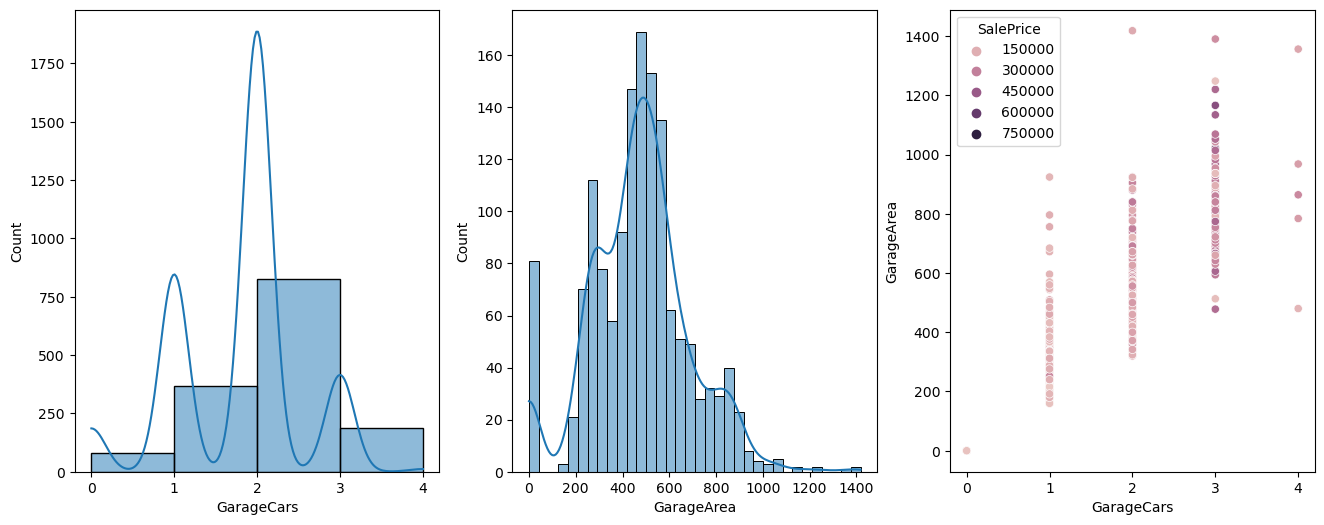

In [134]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
sns.histplot(x='GarageCars', data=train_data, bins=range(0,5), kde=True, ax=ax[0])
sns.histplot(x='GarageArea', data=train_data, ax=ax[1], kde=True)
sns.scatterplot(x='GarageCars', y='GarageArea', hue='SalePrice', data=train_data, ax=ax[2])
plt.show()

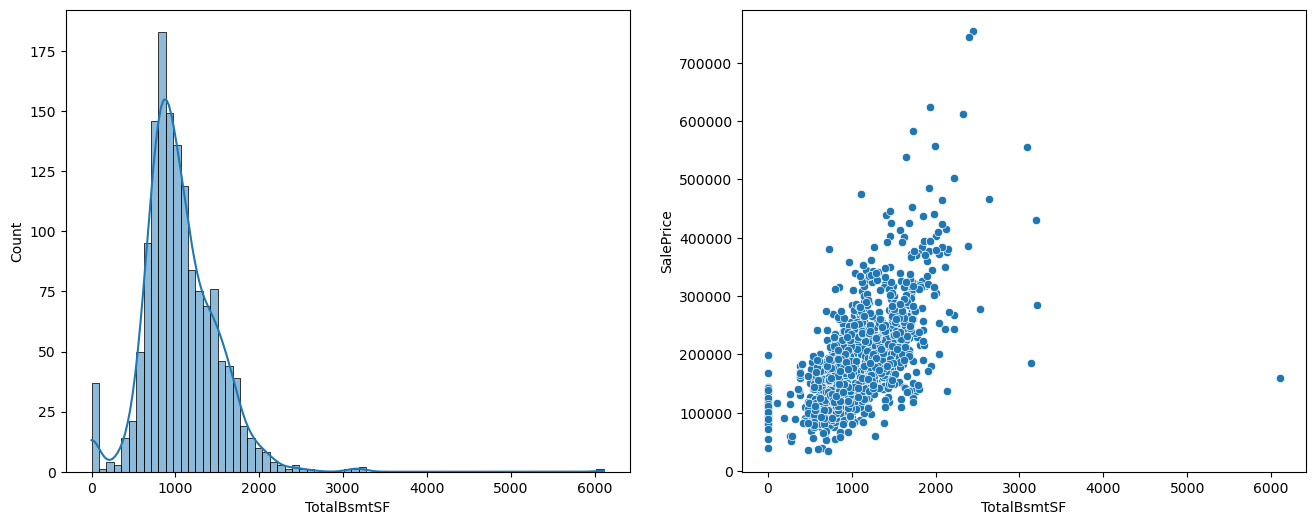

In [135]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.histplot(x='TotalBsmtSF', data=train_data, ax=ax[0], kde=True)
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_data, ax=ax[1])
plt.show()

In [136]:
y = train_data['SalePrice']
X = train_data.drop(['SalePrice'], axis=1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(73,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model1.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

In [142]:
model1.fit(X_train, y_train, epochs=200)

Epoch 1/200
37/37 [==============================] - 2s 4ms/step - loss: 181319.6094 - mae: 181319.6094
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 174818.6094 - mae: 174818.6094
Epoch 3/200
37/37 [==============================] - 0s 3ms/step - loss: 107918.2734 - mae: 107918.2734
Epoch 4/200
37/37 [==============================] - 0s 3ms/step - loss: 40405.7031 - mae: 40405.7031
Epoch 5/200
37/37 [==============================] - 0s 4ms/step - loss: 27853.5234 - mae: 27853.5234
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 23487.1328 - mae: 23487.1328
Epoch 7/200
37/37 [==============================] - 0s 3ms/step - loss: 21364.2891 - mae: 21364.2891
Epoch 8/200
37/37 [==============================] - 0s 3ms/step - loss: 20036.0312 - mae: 20036.0312
Epoch 9/200
37/37 [==============================] - 0s 3ms/step - loss: 18908.7031 - mae: 18908.7031
Epoch 10/200
37/37 [==============================] - 0s 3ms/step - loss: 18

37/37 [==============================] - 0s 4ms/step - loss: 8211.1348 - mae: 8211.1348
Epoch 82/200
37/37 [==============================] - 0s 3ms/step - loss: 7984.3569 - mae: 7984.3569
Epoch 83/200
37/37 [==============================] - 0s 4ms/step - loss: 7900.3877 - mae: 7900.3877
Epoch 84/200
37/37 [==============================] - 0s 3ms/step - loss: 7871.6216 - mae: 7871.6216
Epoch 85/200
37/37 [==============================] - 0s 3ms/step - loss: 7829.9321 - mae: 7829.9321
Epoch 86/200
37/37 [==============================] - 0s 3ms/step - loss: 7943.4048 - mae: 7943.4048
Epoch 87/200
37/37 [==============================] - 0s 3ms/step - loss: 7728.9375 - mae: 7728.9375
Epoch 88/200
37/37 [==============================] - 0s 3ms/step - loss: 7676.3979 - mae: 7676.3979
Epoch 89/200
37/37 [==============================] - 0s 3ms/step - loss: 7724.4287 - mae: 7724.4287
Epoch 90/200
37/37 [==============================] - 0s 3ms/step - loss: 7619.9707 - mae: 7619.9707
Epo

37/37 [==============================] - 0s 3ms/step - loss: 5923.7065 - mae: 5923.7065
Epoch 162/200
37/37 [==============================] - 0s 3ms/step - loss: 6035.5371 - mae: 6035.5371
Epoch 163/200
37/37 [==============================] - 0s 3ms/step - loss: 5998.5474 - mae: 5998.5474
Epoch 164/200
37/37 [==============================] - 0s 3ms/step - loss: 5920.4946 - mae: 5920.4946
Epoch 165/200
37/37 [==============================] - 0s 3ms/step - loss: 5984.2876 - mae: 5984.2876
Epoch 166/200
37/37 [==============================] - 0s 3ms/step - loss: 6102.3096 - mae: 6102.3096
Epoch 167/200
37/37 [==============================] - 0s 4ms/step - loss: 6020.5571 - mae: 6020.5571
Epoch 168/200
37/37 [==============================] - 0s 3ms/step - loss: 5847.4907 - mae: 5847.4907
Epoch 169/200
37/37 [==============================] - 0s 3ms/step - loss: 5880.2524 - mae: 5880.2524
Epoch 170/200
37/37 [==============================] - 0s 3ms/step - loss: 5852.7949 - mae: 5852

In [143]:
y_pred = model1.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [144]:
r2_score(y_pred, y_test)

0.8311886705517129

In [148]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=1200,max_depth=3,min_child_weight=3,subsample=1,random_state=15,colsample_bynode=0.17,n_jobs=-1)

In [149]:
xgbmodel = xgb.fit(X_train, y_train)

In [150]:
y_pred = xgbmodel.predict(X_test)

In [151]:
r2_score(y_pred, y_test)

0.8974584007718682

In [153]:
test_data.drop(['SalePrice'], axis=1, inplace=True)

In [154]:
y_pred_sub = xgbmodel.predict(test_data)

In [155]:
y_pred_sub

array([359308.06, 271371.66, 415943.2 , ..., 346579.9 , 270499.7 ,
       436411.03], dtype=float32)

In [159]:
submission = pd.DataFrame({
    'Id':test_data['Id'],
    'SalePrice': y_pred_sub
})

In [162]:
submission.to_csv('../datasets/sample_submission1.csv', index=False)